In [13]:
from __future__ import annotations
from meterviewer.datasets import dataset, single
from meterviewer.config import get_root_path
from meterviewer.img import process
from meterviewer import T

In [14]:
import typing as t
import pathlib
import toml
import functools
import random

getList = t.Literal["dataset", "path", "length", "total_nums"]


def load_config(config_path: pathlib.Path) -> t.Callable[[getList], t.Any]:
    data: t.Optional[dict] = None
    dataset_list: t.List[str] = []

    def load_conf() -> dict:
        nonlocal data
        if data is None:
            with open(config_path, "r") as f:
                data = toml.load(f)
        assert data is not None, (config_path, data)
        return data

    def get_dataset() -> str:
        nonlocal dataset_list
        dataset_list = get_config("dataset")
        return random.choice(dataset_list)

    def get_config(name: str):
        c = load_conf().get("generate_config", None)
        if c is None:
            raise Exception('config "generate_config" not found')
        return c.get(name)

    pt = functools.partial
    get_path = pt(get_config, name="path")
    get_length = pt(get_config, name="length")
    get_total_nums = pt(get_config, name="total_nums")

    def get_func(name: getList) -> t.Callable:
        func_map: t.Mapping[str, t.Callable] = {
            "dataset": get_dataset,
            "path": get_path,
            "length": get_length,
            "total_nums": get_total_nums,
        }
        return func_map[name]

    return get_func

In [15]:
root_path = get_root_path()


def new_read_rand_img(config_path: pathlib.Path):
    get_f = load_config(config_path=config_path)

    def read_rand_img(digit: int | str) -> T.NpImage:
        return single.read_rand_img(
            digit=digit,
            root=root_path,
            get_dataset=get_f("dataset"),
            promise=True,
        )

    return read_rand_img

def resize_join(imglist: T.ImgList, check_func: t.Callable[[T.ImgList], t.Any]) -> T.ImgList:
    new_img_list = process.resize_imglist(imglist)
    return process.join_img(new_img_list, check_func)

def gen(
    config_path,
    digit_list=["1", "2", "3", "4"],
):
    im = dataset.generate_block_img(
        digit_list,
        resize_join,
        new_read_rand_img(config_path),
    )
    process.show_img(im, is_stop=0)

2024-11-20 15:38:00.367 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\1
2024-11-20 15:38:00.369 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\2
2024-11-20 15:38:00.371 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\3
2024-11-20 15:38:00.373 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\9
2024-11-20 15:38:00.374 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\9
2024-11-20 15:38:00.375 | DEBUG    | meterviewer.datasets.single:read_single_digit:106 - path: D:\Files\Code\2024Master\Xiu\MeterData\lens_6\XL\XL\M1L1XL\Digit\9


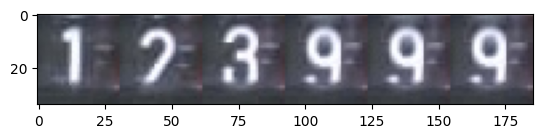

In [16]:
config_path = "./dataset-gen copy.toml"
gen(config_path, list("123999"))

image: 2 size: (33, 27, 3), not match size: [33, 26, 3]


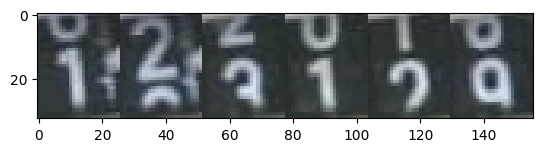

In [18]:
gen(list("123129"))